The Dataset contains the following 12 features:

CustomerID: A unique identifier

Age: The age of the customer

Gender: The gender of the customer

Tenure: The number of months the customer has stayed with the company

Usage Frequency: The number of times the customer has used the service the past month

Support calls: The number of support calls the customer has made the past month

Payment Delay: Number of days the customer has delayed payment the past month

Subscription Type: The type of subscription the customer has

Contract Length: Duration of the contract

Total Spend: The total amount the customer has spent

Last Interaction: Number of days since the last interaction the customer has had with the company

Churn: Whether the customer has churned or not

# Import packages

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Cleanup

In [2]:
test_set_dirty = pd.read_csv("Datasets/In/customer_churn_dataset-testing-master.csv", sep=",")
training_set_dirty = pd.read_csv("Datasets/In/customer_churn_dataset-training-master.csv", sep=",")

combined_set_dirty = pd.concat([training_set_dirty, test_set_dirty], ignore_index=True)
combined_set_dirty = combined_set_dirty.drop(combined_set_dirty.columns[0], axis=1)


In [3]:
missing_values = combined_set_dirty.isnull().sum()
missing_values

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [4]:
combined_set_dirty[combined_set_dirty.isna().any(axis=1)]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# remove row with missing values
combined_set_dirty.dropna(inplace=True)

combined_set_dirty.columns = [col.lower().replace(" ", "_") for col in combined_set_dirty.columns]
combined_set_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505206 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505206 non-null  float64
 1   gender             505206 non-null  object 
 2   tenure             505206 non-null  float64
 3   usage_frequency    505206 non-null  float64
 4   support_calls      505206 non-null  float64
 5   payment_delay      505206 non-null  float64
 6   subscription_type  505206 non-null  object 
 7   contract_length    505206 non-null  object 
 8   total_spend        505206 non-null  float64
 9   last_interaction   505206 non-null  float64
 10  churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


In [7]:
combined_set_dirty[combined_set_dirty.isna().any(axis=1)]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


In [8]:
numerals = ["age", "tenure", "usage_frequency", "support_calls", "payment_delay", "last_interaction", "churn"]

for col in numerals:
    combined_set_dirty[col] = combined_set_dirty[col].astype(int)
    

In [ ]:
# # Create a label encoder object
# le = LabelEncoder()
# 
# # List of columns you want to convert
# columns_to_convert = ['gender', 'subscription_type', 'contract_length']
# 
# # Apply the label encoder to each column and print the mapping
# for column in columns_to_convert:
#     combined_set_dirty[column] = le.fit_transform(combined_set_dirty[column])
#     print(f"Mapping for {column}:")
#     for class_, label in zip(le.classes_, range(len(le.classes_))):
#         print(f"{class_} -> {label}")
#     print("\n")

In [9]:
cleaned_set = combined_set_dirty.copy()

Descriptive Analytics

In [ ]:
# Summary statistics
print("Summary Statistics for Churned Customers:")
print(cleaned_set[cleaned_set['churn'] == 1].describe())
print("\nSummary Statistics for Non-Churned Customers:")
print(cleaned_set[cleaned_set['churn'] == 0].describe())

# Distribution of categorical variables
categorical_columns = ['gender', 'subscription_type', 'contract_length']
for column in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=cleaned_set, x=column, hue='churn')
    plt.title(f'Distribution of {column} for Churned and Non-Churned Customers')
    plt.show()

# Correlation analysis
correlation = cleaned_set.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Churn rate
churn_rate = cleaned_set['churn'].mean() * 100
print(f"Churn Rate: {churn_rate}%")

In [ ]:
numeric_cols = ["age", "tenure", "usage_frequency", "support_calls", "payment_delay", "last_interaction", "total_spend"]

num_bins = 3

excourse_set = cleaned_set.copy()

for col in numeric_cols:
    excourse_set[col] = pd.cut(cleaned_set[col], num_bins, duplicates='drop')
    print(col)
    for interval in excourse_set[col].cat.categories:
        print(interval)

In [ ]:
columns = ["age", "gender", "tenure", "usage_frequency", "support_calls", "payment_delay", "subscription_type", "contract_length", "total_spend", "last_interaction"]

stacked_data_percent = {}

for col in columns:
    category_counts = excourse_set.groupby([col, "churn"]).size().unstack(fill_value=0)
    
    category_percent = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
    print(category_percent)
    stacked_data_percent[col] = category_percent
    

In [ ]:
# Calculate the overall churn rate
overall_churn_rate = excourse_set['churn'].mean() * 100

# Add a new row to each DataFrame in stacked_data_percent with the overall churn rate
for col, df in stacked_data_percent.items():
    df.loc['Overall'] = [100 - overall_churn_rate, overall_churn_rate]
    
colors = {0: 'green', 1: 'red'}
for col, df in stacked_data_percent.items():
    ax = df.plot(kind='barh', stacked=True, color=[colors[churn] for churn in df.columns],
                 title=f'Percentage Chart of Churned Customers in {col}')
    plt.ylabel(col)
    plt.xlabel('Percentage')
    plt.legend(["No Churn", "Churn"], loc='best')

    # Add the percentage values on each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                '{:.1f} %'.format(width),
                horizontalalignment='center',
                verticalalignment='center')
    plt.show()

In [ ]:
combinations = list(itertools.combinations(columns, 2))

# Analyze each combination
for combination in combinations:
    # Create a multi-index DataFrame
    multi_index_df = excourse_set.set_index(list(combination) + ['churn'])

    # Calculate the size of each group
    grouped_df = multi_index_df.groupby(list(combination) + ['churn']).size()

    # Unstack the DataFrame to get a cross-tabulation
    cross_tab = grouped_df.unstack(fill_value=0)

    # Convert absolute numbers to relative percentages
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Print the cross-tabulation
    print(f"Cross-tabulation for {combination}:")
    print(cross_tab_percent)
    print("\n")

In [ ]:
combinations = list(itertools.combinations(columns, 3))

# Analyze each combination
for combination in combinations:
    # Create a multi-index DataFrame
    multi_index_df = excourse_set.set_index(list(combination) + ['churn'])

    # Calculate the size of each group
    grouped_df = multi_index_df.groupby(list(combination) + ['churn']).size()

    # Unstack the DataFrame to get a cross-tabulation
    cross_tab = grouped_df.unstack(fill_value=0)

    # Convert absolute numbers to relative percentages
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Print the cross-tabulation
    print(f"Cross-tabulation for {combination}:")
    print(cross_tab_percent)
    print("\n")

# Predictive Analytics
## Primitive Approach

In [29]:
primitive_set = cleaned_set.copy()

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False)

# Identify categorical columns
categorical_cols = ['gender', 'subscription_type', 'contract_length']

# Fit and transform the data, converting it into a DataFrame
primitive_set_encoded = pd.DataFrame(encoder.fit_transform(primitive_set[categorical_cols]))

# Get feature names from the encoder and assign them as column names
primitive_set_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop the original categorical columns
primitive_set.drop(categorical_cols, axis=1, inplace=True)

# Reset the indices of the dataframes
primitive_set = primitive_set.reset_index(drop=True)
primitive_set_encoded = primitive_set_encoded.reset_index(drop=True)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
primitive_set = pd.concat([primitive_set, primitive_set_encoded], axis=1)

primitive_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   age                         505206 non-null  int32  
 1   tenure                      505206 non-null  int32  
 2   usage_frequency             505206 non-null  int32  
 3   support_calls               505206 non-null  int32  
 4   payment_delay               505206 non-null  int32  
 5   total_spend                 505206 non-null  float64
 6   last_interaction            505206 non-null  int32  
 7   churn                       505206 non-null  int32  
 8   gender_Female               505206 non-null  float64
 9   gender_Male                 505206 non-null  float64
 10  subscription_type_Basic     505206 non-null  float64
 11  subscription_type_Premium   505206 non-null  float64
 12  subscription_type_Standard  505206 non-null  float64
 13  contract_lengt

MSE: 0.15392609014073355
MAE: 0.15392609014073355
R2: 0.3768018443702186


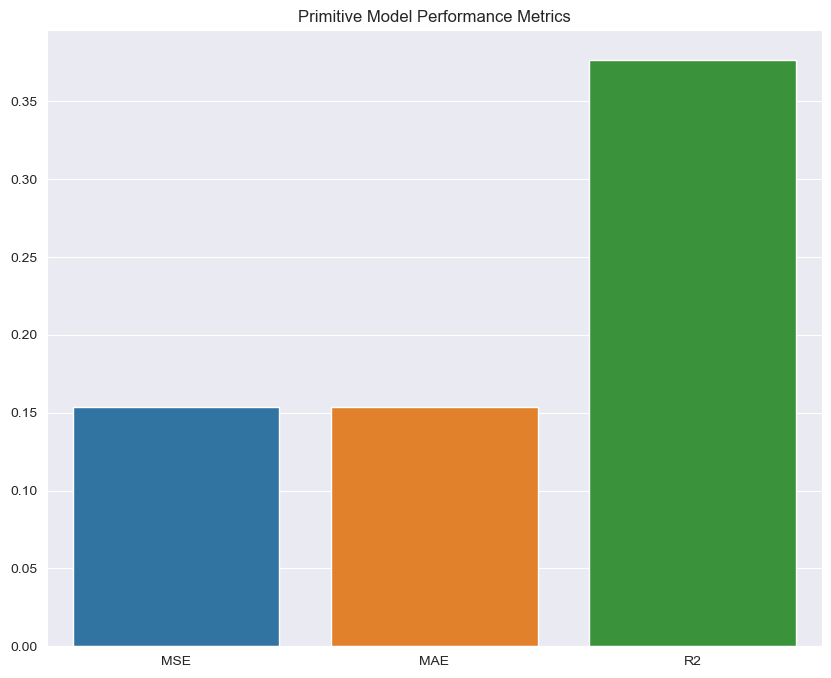

In [36]:
X = primitive_set.drop('churn', axis=1)
y = primitive_set['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



plt.figure(figsize=(10, 8))
sns.barplot(x=["MSE", "MAE", "R2"], y=[mse, mae, r2])
plt.title("Primitive Model Performance Metrics")
plt.show()


In [38]:
# Calculate the performance metrics

# Predict the probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"MSE: {mse}\nMAE: {mae}\nR2: {r2}\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC AUC: {roc_auc}")

MSE: 0.15392609014073355
MAE: 0.15392609014073355
R2: 0.3768018443702186
Accuracy: 0.8460739098592664
Precision: 0.8717967545341068
Recall: 0.8471486416581937
F1 Score: 0.8592959823407545
ROC AUC: 0.9068711030711689
